🧪 1. Linear Regression dengan Normal Equation

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Contoh data sederhana (fitur 1D, target 1D)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Gunakan LinearRegression dari sklearn (Normal Equation)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Intercept:", lin_reg.intercept_)
print("Koefisien:", lin_reg.coef_)

Intercept: [4.15839186]
Koefisien: [[2.96183254]]


🧪 2. Linear Regression dengan Stochastic Gradient Descent

In [3]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SGD Regressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X_scaled, y.ravel())

print("Intercept (SGD):", sgd_reg.intercept_)
print("Koefisien (SGD):", sgd_reg.coef_)

Intercept (SGD): [7.25034049]
Koefisien (SGD): [1.58865713]


🧪 3. Ridge Regression (L2 Regularization)

In [4]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0, solver="cholesky")
ridge_reg.fit(X, y)

print("Intercept (Ridge):", ridge_reg.intercept_)
print("Koefisien (Ridge):", ridge_reg.coef_)

Intercept (Ridge): [4.25842899]
Koefisien (Ridge): [2.8673954]


🧪 4. Lasso Regression (L1 Regularization)

In [5]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

print("Intercept (Lasso):", lasso_reg.intercept_)
print("Koefisien (Lasso):", lasso_reg.coef_)

Intercept (Lasso): [4.50726992]
Koefisien (Lasso): [2.6324844]


🧪 5. Polynomial Regression + Pipeline

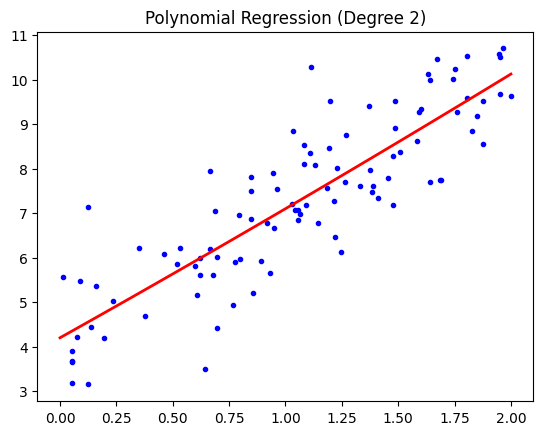

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Pipeline: PolynomialFeatures + StandardScaler + LinearRegression
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

poly_reg.fit(X, y)

# Prediksi untuk nilai baru
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_new = poly_reg.predict(X_new)

import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2)
plt.title("Polynomial Regression (Degree 2)")
plt.show()

📈 6. Visualisasi Learning Curves

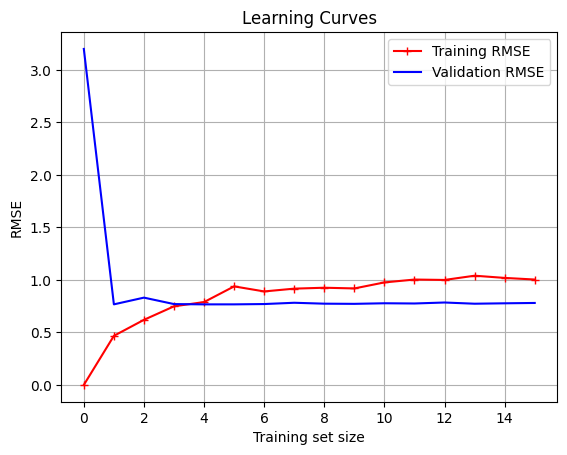

In [8]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

def plot_learning_curves(model, X, y):
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train), 5):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        train_mse = mean_squared_error(y_train[:m], y_train_predict)
        val_mse = mean_squared_error(y_val, y_val_predict)

        train_errors.append(np.sqrt(train_mse))
        val_errors.append(np.sqrt(val_mse))

    plt.plot(train_errors, "r-+", label="Training RMSE")
    plt.plot(val_errors, "b-", label="Validation RMSE")
    plt.legend()
    plt.title("Learning Curves")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.grid()
    plt.show()

# Contoh: gunakan model linier
lin_model = LinearRegression()
plot_learning_curves(lin_model, X, y)

### ✅ Penjelasan:

* **Normal Equation** hanya cocok untuk dataset kecil.
* **SGDRegressor** bagus untuk dataset besar dan bisa di-*tune*.
* **Ridge & Lasso** menambahkan penalti untuk mengurangi overfitting.
* **Polynomial Regression** bisa menangani data nonlinier dengan tetap memakai model linier di fiturnya.
* **Learning Curves** membantu mengevaluasi seberapa baik model belajar dan apakah perlu ditingkatkan.